In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Final_Product_Data (1).csv')

In [ ]:
data.head()

,Date,Product Name,Price,Quantity Sold,Total
0,2024-01-01,Kadhai medium,450,2,900
1,2024-01-01,Kadhai small,350,1,350
2,2024-01-01,Knife Set,250,2,500
3,2024-01-01,Kadhai small,350,3,1050
4,2024-01-01,Plastic Fork set,40,2,80


In [ ]:
data.describe()

,Price,Quantity Sold,Total
count,3298.000000,3298.000000,3298.000000
mean,187.218617,1.936022,303.219224
std,283.246741,0.828939,356.591326
min,8.000000,1.000000,8.000000
25%,35.000000,1.000000,60.000000
50%,100.000000,2.000000,160.000000
75%,200.000000,3.000000,450.000000
max,3200.000000,3.000000,3200.000000


In [ ]:

data['Total'].sum()

1000017

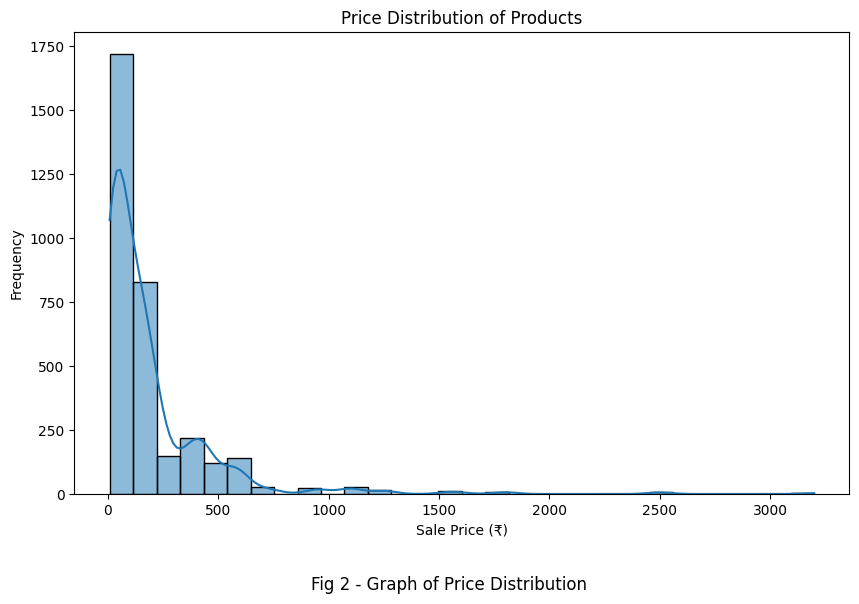

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the histogram
plt.figure(figsize=(10,6))
sns.histplot(data['Price'], kde=True, bins=30)
plt.title('Price Distribution of Products')
plt.xlabel('Sale Price (₹)')
plt.ylabel('Frequency')

plt.figtext(0.5, -0.05, "Fig 2 - Graph of Price Distribution", ha="center", fontsize=12)

plt.show()


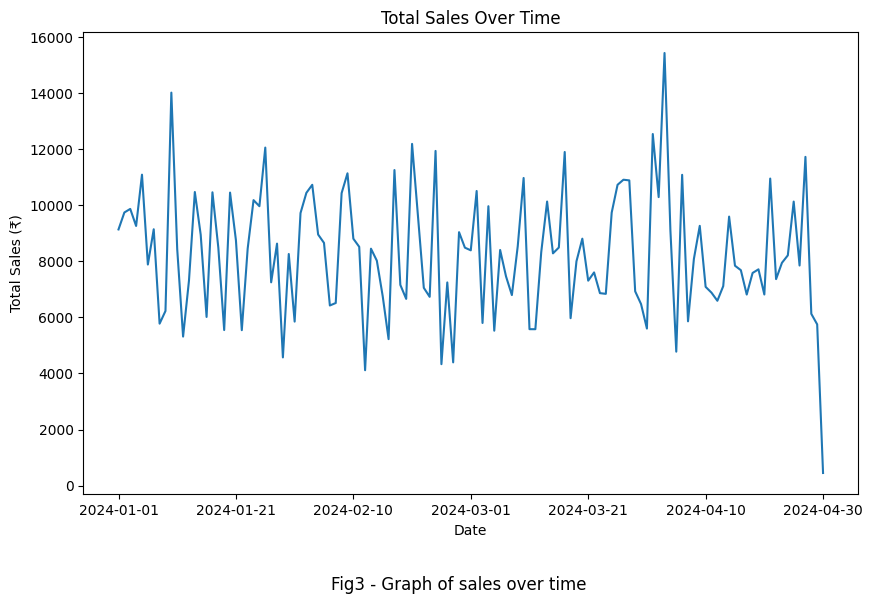

In [ ]:
data['Total Sales'] = data['Price'] * data['Quantity Sold']
data.groupby('Date')['Total Sales'].sum().plot(figsize=(10,6), title='Total Sales Over Time')
plt.ylabel('Total Sales (₹)')

plt.figtext(0.5, -0.05, "Fig3 - Graph of sales over time", ha="center", fontsize=12)

plt.show()



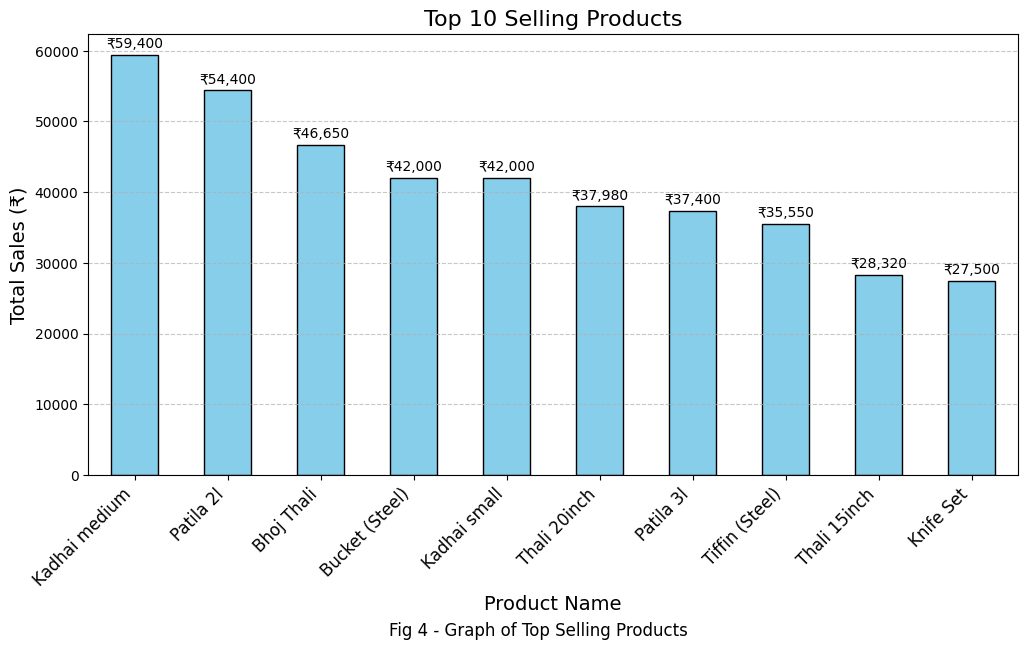

In [ ]:
import matplotlib.pyplot as plt

# Sales by Product
top_products = data.groupby('Product Name')['Total'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,7))
top_products.plot(kind='bar', color='skyblue', edgecolor='black')

# Title and Labels
plt.title('Top 10 Selling Products', fontsize=16)
plt.ylabel('Total Sales (₹)', fontsize=14)
plt.xlabel('Product Name', fontsize=14)

# Rotate x-ticks for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of bars
for i in range(len(top_products)):
    plt.text(i, top_products.iloc[i] + 1000, f'₹{top_products.iloc[i]:,.0f}', ha='center', fontsize=10)

# Increase space at the bottom to prevent overlap
plt.subplots_adjust(bottom=0.25)

# Move the figure label down
plt.figtext(0.5, 0.02, "Fig 4 - Graph of Top Selling Products", ha="center", fontsize=12)

# Show the plot
plt.show()


In [ ]:

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)


daily_sales = data['Total'].resample('D').sum()

print(daily_sales.head())


Date
2024-01-01     9136
2024-01-02     9741
2024-01-03     9868
2024-01-04     9260
2024-01-05    11089
Freq: D, Name: Total, dtype: int64


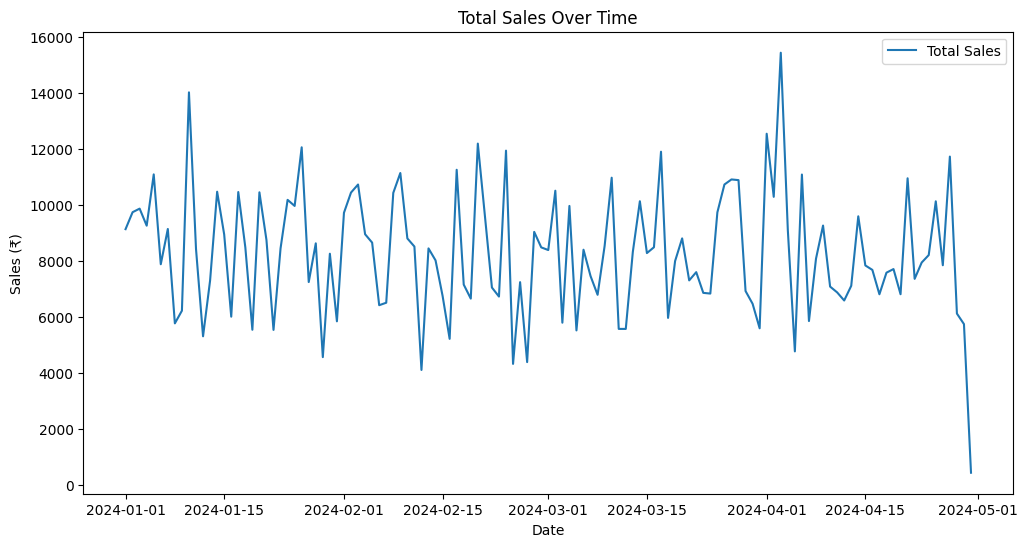

In [ ]:
import matplotlib.pyplot as plt

# Plot the daily sales
plt.figure(figsize=(12,6))
plt.plot(daily_sales, label='Total Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (₹)')
plt.legend()
plt.show()


In [ ]:
data.head()

,Product Name,Price,Quantity Sold,Total,Total Sales
Date,,,,,
2024-01-01,Kadhai medium,450,2,900,900
2024-01-01,Kadhai small,350,1,350,350
2024-01-01,Knife Set,250,2,500,500
2024-01-01,Kadhai small,350,3,1050,1050
2024-01-01,Plastic Fork set,40,2,80,80
